In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
oliv['data'].shape #Flattened the images

(400, 4096)

In [5]:
oliv['images'].shape #Images in original shape

(400, 64, 64)

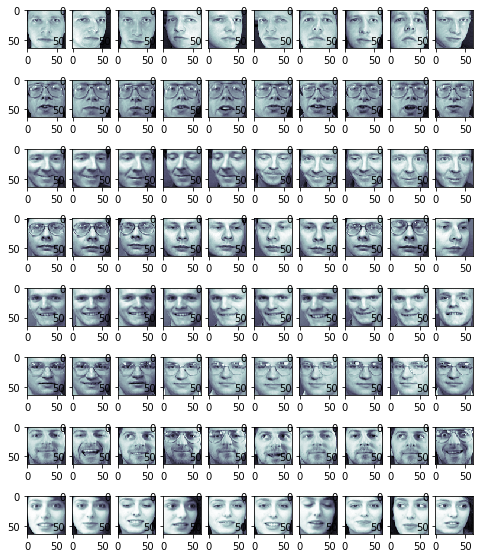

In [6]:
fig = plt.figure(figsize = (8,10))
for i in range(80):
    ax = fig.add_subplot(8, 10, i+1)
    ax.imshow(oliv.images[i] , cmap = plt.cm.bone)
plt.show()

## PCA requires images to be in 2d shape 

In [11]:
x = oliv.data
y = oliv.target
y.shape

(400,)

In [8]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_

array([[-0.00419108, -0.0071095 , -0.0093361 , ...,  0.0001852 ,
         0.00337969,  0.00318829],
       [-0.0285913 , -0.03328845, -0.03784651, ...,  0.0296278 ,
         0.02721298,  0.02488896],
       [ 0.001357  , -0.00032572, -0.00019798, ..., -0.01541373,
        -0.01370984, -0.01188347],
       ...,
       [ 0.00223493,  0.02056659,  0.01515914, ..., -0.01273556,
        -0.05848991, -0.07650287],
       [ 0.01714708,  0.02917742, -0.00942486, ...,  0.00159098,
         0.01249339, -0.0081527 ],
       [-0.00326934,  0.01032978,  0.01475757, ..., -0.01187175,
        -0.01629114, -0.00553756]], dtype=float32)

In [10]:
pca.components_.shape

(400, 4096)

In [22]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k += 1
print(k)

123


In [35]:
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [36]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [37]:
x_approx

array([[0.2967586 , 0.38887775, 0.4392287 , ..., 0.16523236, 0.1518644 ,
        0.19227153],
       [0.52221084, 0.49033335, 0.49464548, ..., 0.13382056, 0.16316791,
        0.09296802],
       [0.29202902, 0.35033798, 0.45950115, ..., 0.1383273 , 0.13420612,
        0.15008157],
       ...,
       [0.4679222 , 0.5216161 , 0.5926604 , ..., 0.19753164, 0.16493107,
        0.17764707],
       [0.29298905, 0.3046078 , 0.2833099 , ..., 0.5751022 , 0.5900513 ,
        0.5700543 ],
       [0.44124097, 0.43085834, 0.357787  , ..., 0.3409101 , 0.30304635,
        0.36638346]], dtype=float32)

In [38]:
x_approx_images = x_approx.reshape((400, 64, 64))

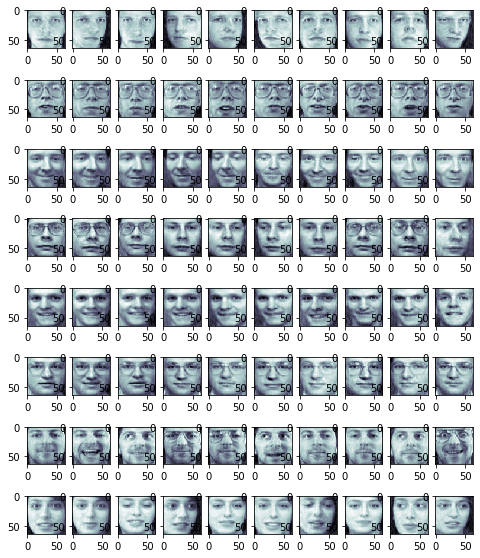

In [40]:
fig = plt.figure(figsize = (8,10))
for i in range(80):
    ax = fig.add_subplot(8, 10, i+1)
    ax.imshow(x_approx_images[i] , cmap = plt.cm.bone)
plt.show()

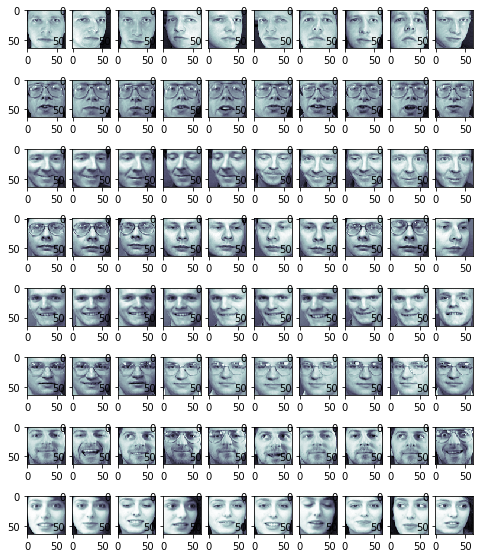

In [29]:
fig = plt.figure(figsize = (8,10))
for i in range(80):
    ax = fig.add_subplot(8, 10, i+1)
    ax.imshow(oliv.images[i] , cmap = plt.cm.bone)
plt.show()

In [41]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [42]:
eigenfaces = eigenv.reshape((123, 64, 64))

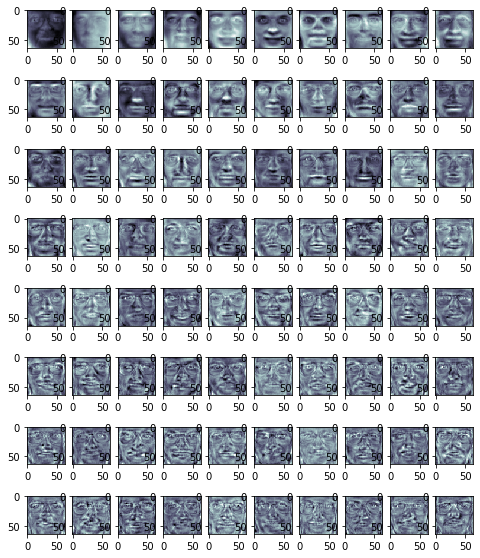

In [43]:
fig = plt.figure(figsize = (8,10))
for i in range(80):
    ax = fig.add_subplot(8, 10, i+1)
    ax.imshow(eigenfaces[i] , cmap = plt.cm.bone)
plt.show()